# Inserted Border Issue Example

This notebook illustrates the known bug that a structure that borders another 
structure at the end of a hole within the first structure will not be correctly 
recognized as a *Borders* relationship.

This is the result of the bug that an open hole that is open only on one end 
will be treated as open on both ends for the sake of boundary testing. 


## Setup

In [1]:
import logging

# Local functions and classes
#from types_and_classes import *
#from utilities import *
from debug_tools import make_vertical_cylinder, plot_ab
from structure_set import StructureSet
from relations import DE27IM

### Global Settings

In [2]:
PRECISION = 2

In [3]:
%matplotlib inline

### Display Function

In [4]:
def relation_example(structure_a,structure_b, slice_index):
    poly_a = structure_a.get_slice(slice_index)
    poly_b = structure_b.get_slice(slice_index)

    r = DE27IM(poly_a, poly_b)
    print('Relation Binary')
    print(r)
    print('Relationship', r.identify_relation())
    plot_ab(poly_a.merge_regions(), poly_b.merge_regions())

## Relationship Tests by Relationship Type

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Borders

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The exterior boundaries of 
<span class="a">a</span> and <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/borders.png" alt="Borders">
<img src="../../Images/Relationships/Concave Borders.png" alt="Concave Borders">
</td></tr></table>

In [5]:
print(DE27IM.test_binaries[3])

RelationshipTest(Relationship: Borders
  Mask:
    |100| |000| |000|
    |010| |000| |000|
    |000| |100| |000|
  Value
    |000| |000| |000|
    |010| |000| |000|
    |000| |100| |000|




_**ERROR** A hole that is open only on one end is being subtracted at both boundaries._

### Inserted Concentric Cylinder
  - Primary: Central Hollow Cylinder closed at one end (A bucket like shape).
  - Secondary: Concentric narrower cylinder fitting into the space created by the hole and ending on the same slice where the hole is closed. It also extends beyond the other end of the primary cylinder.
- The boundary is with the closed end of the hollow cylinder.


In [6]:
def inserted_cylinder_example():
    '''Test cylinder inserted in open hole of first cylinder.'''
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                spacing=slice_spacing)
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=4, length=0.6,
                                              offset_z=-0.3,
                                              spacing=slice_spacing)
    center_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.4,
                                         offset_z=-0.4, spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1, length=0.6,
                                            offset_z=-0.5,
                                            spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + center_hole + middle_cylinder
    return slice_data


In [7]:
slice_data = inserted_cylinder_example()


In [8]:
#logging.getLogger('structure_set').setLevel(logging.DEBUG)
#logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
#logging.getLogger('structure_set').setLevel(logging.INFO)
#logging.getLogger('contour_graph').setLevel(logging.INFO)

In [9]:
structure_a = structures.structures[1]
structure_b = structures.structures[2]


Relation Binary
|001| |000| |000|
|001| |000| |000|
|011| |000| |000|

Relationship Relationship: Unknown


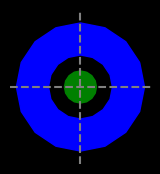

In [10]:
relation_example(structure_a, structure_b, slice_index=-0.15)

In [11]:
logging.getLogger('structures').setLevel(logging.DEBUG)
relation = structure_a.relate(structure_b)
logging.getLogger('structures').setLevel(logging.INFO)

DEBUG:structures:SliceIndex: -0.85,
RelationType: Relationship: Disjoint
Relation:
|000| |000| |000|
|000| |000| |000|
|111| |111| |111|


DEBUG:structures:SliceIndex: -0.8,
RelationType: Relationship: Disjoint
Relation:
|000| |000| |000|
|000| |000| |000|
|111| |111| |111|


DEBUG:structures:SliceIndex: -0.7,
RelationType: Relationship: Disjoint
Relation:
|000| |000| |000|
|000| |000| |000|
|111| |111| |111|


DEBUG:structures:SliceIndex: -0.65,
RelationType: Relationship: Unknown
Relation:
|000| |000| |000|
|001| |000| |000|
|111| |000| |000|


DEBUG:structures:SliceIndex: -0.6,
RelationType: Relationship: Shelters
Relation:
|001| |001| |111|
|001| |001| |001|
|111| |111| |001|


DEBUG:structures:SliceIndex: -0.5,
RelationType: Relationship: Shelters
Relation:
|001| |001| |111|
|001| |001| |001|
|111| |111| |001|


DEBUG:structures:SliceIndex: -0.4,
RelationType: Relationship: Shelters
Relation:
|001| |001| |111|
|001| |001| |001|
|111| |111| |001|


DEBUG:structures:SliceIndex: -0.3

In [12]:
print(relation)
relation_type = relation.identify_relation()
print(relation_type)

|001| |001| |111|
|001| |001| |001|
|111| |111| |111|

Relationship: Disjoint


In [13]:
print(DE27IM.test_binaries[3])

RelationshipTest(Relationship: Borders
  Mask:
    |100| |000| |000|
    |010| |000| |000|
    |000| |100| |000|
  Value
    |000| |000| |000|
    |010| |000| |000|
    |000| |100| |000|




In [14]:
#assert relation_type == RelationshipType.BORDERS

In [15]:
selected_columns = ['SliceIndex', 'HoleType', 'Interpolated',
                    'Boundary', 'RegionIndex']
selected_rows = structure_a.contour_lookup.SliceIndex > -0.30
print(structure_a.contour_lookup.loc[selected_rows,selected_columns])
print(structure_b.contour_lookup[selected_columns])

    SliceIndex HoleType  Interpolated  Boundary RegionIndex
8        -0.20     None         False     False          1A
9        -0.20     Open         False     False          1B
15       -0.15     Open          True      True          1B
16       -0.15     None          True     False          1A
10       -0.10     None         False     False          1A
17       -0.05     None          True     False          1A
11        0.00     None         False     False          1A
12        0.05     None          True      True          1A
   SliceIndex HoleType  Interpolated  Boundary RegionIndex
7       -0.85     None          True      True          2A
0       -0.80     None         False     False          2A
1       -0.70     None         False     False          2A
9       -0.65     None          True     False          2A
2       -0.60     None         False     False          2A
3       -0.50     None         False     False          2A
4       -0.40     None         False     False 

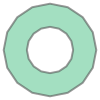

In [16]:
poly_a = structure_a.get_slice(-0.15)
poly_a.merge_regions()

1


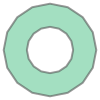

In [17]:
print(len(poly_a.regions))
rr = list(poly_a.regions.values())[0]
rr

In [18]:
list(poly_a.regions.values())

[<MULTIPOLYGON Z (((2.828 2.828 -0.2, 3.696 1.531 -0.2, 4 0 -0.2, 3.696 -1.53...>]

In [19]:
list(poly_a.boundaries.values())

[<MULTIPOLYGON EMPTY>]

In [20]:
print(len(poly_a.boundaries))
br = list(poly_a.boundaries.values())[0]
# br

1


In [21]:
# plot_ab(rr, br)

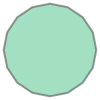

In [22]:
poly_b = structure_b.get_slice(-0.15)
poly_b.merge_regions()

In [23]:
list(poly_b.boundaries.values())

[<MULTIPOLYGON Z (((0 1 -0.2, 0.4 0.9 -0.2, 0.7 0.7 -0.2, 0.9 0.4 -0.2, 1 0 -...>]

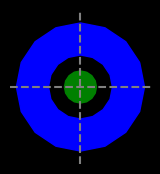

<Axes: >

In [24]:
poly_b_b = list(poly_b.boundaries.values())[0]
plot_ab(rr, poly_b_b)

In [25]:
#plot_ab(br, poly_b_b)

2 [(np.int64(1), -0.15, 28) (np.int64(1), -0.15, 29)]
(np.int64(1), -0.15, 28)
True
[(np.int64(1), -0.15, 29)]


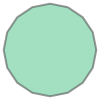

In [26]:
idx = structure_a.contour_lookup.SliceIndex == -0.15
contour_ref = structure_a.contour_lookup.Label[idx].values
print(len(contour_ref), contour_ref)
contours = structure_a.contour_graph.nodes.data('contour')
c1 = contours[contour_ref[0]]
print(c1.index)
print(c1.is_hole)
print(c1.related_contours)
c1.poly_h

(np.int64(1), -0.15, 29)
False
[(np.int64(1), -0.15, 28)]


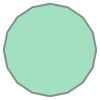

In [27]:
c2 = contours[contour_ref[1]]
print(c2.index)
print(c2.is_hole)
print(c2.related_contours)
c2.poly_h
